# Titanic survival classification problem

In [23]:
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn.model_selection
from keras.optimizers import Adam
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, accuracy_score,recall_score, auc, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dropout

label_encoder = LabelEncoder()

In [25]:
# data load
dataset = sns.load_dataset("titanic")
dataframe, test_dataframe = sklearn.model_selection.train_test_split(dataset, train_size=0.7)
dataframe.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
661,0,3,male,40.0,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
149,0,2,male,42.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
858,1,3,female,24.0,0,3,19.2583,C,Third,woman,False,NaN,Cherbourg,yes,False
61,1,1,female,38.0,0,0,80.0000,NaN,First,woman,False,B,NaN,yes,True
31,1,1,female,NaN,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False


In [50]:
JJJ = float('NaN')
print(JJJ)
if i == i:
    print(True)


nan
True


In [46]:
# data processing
counter = 0
for i in dataframe['deck']:
    if i == i:
        # print(str(dataframe['deck'][counter])+"-"+str(dataframe['deck'][counter][0]))
        print(type(dataframe['deck'][counter]))
        dataframe['deck'][counter] = dataframe['deck'][counter][0]
    else:
        dataframe['deck'][counter] = 'Z'
    counter += 1

counter = 0
for i in test_dataframe['deck']:
    if i == i:
        test_dataframe['deck'][counter] = test_dataframe['deck'][counter][0]
    else:
        test_dataframe['deck'][counter] = 'Z'
    counter += 1

train_median = dataframe['age'].median()
counter = 0
for i in dataframe['age']:
    if i != i:
        dataframe['age'][counter] = train_median
    counter += 1

counter = 0
for i in test_dataframe['age']:
    if i != i:
        test_dataframe['age'][counter] = train_median
    counter += 1

X = dataframe[['sex', 'pclass', 'age', 'deck']]
y = dataframe[['alive']]
X_ts = test_dataframe[['sex', 'pclass', 'age', 'deck']]
y_ts = test_dataframe[['alive']]
X.head(10)

<class 'str'>
<class 'float'>


TypeError: 'float' object is not subscriptable

In [3]:
normalization = [X['Age'].mean(), X['Age'].std()]
print("Normalization --> " + str(normalization))

X['Age'] = (X['Age'] - normalization[0]) / normalization[1]
# age_sc = standard_scaler.fit_transform((X['Age']).values.reshape(-1,1))
X_ts['Age'] = (X_ts['Age'] - normalization[0]) / normalization[1]

X_dum = pd.get_dummies(X)
X_ts_dum = pd.get_dummies(X_ts)

Normalization --> [28.681786216596343, 12.823772062210402]


In [4]:
X_ts_dum['Cabin_G'] = np.zeros(len(X_ts_dum))

In [5]:
integer_encoded = label_encoder.fit_transform(y)
y = integer_encoded.reshape(len(integer_encoded), 1)
# y_dum = one_hot_encoder.fit_transform(integer_encoded).toarray()

integer_encoded_ts = label_encoder.fit_transform(y_ts)
y_ts = integer_encoded_ts.reshape(len(integer_encoded_ts), 1)

In [6]:
# X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X_dum, y_dum)
# print(' -Entradas Entrenamiento:', X_train.shape)
# print(' -Salidas Entrenamiento:', y_train.shape)
# print(' -Entradas Val:', X_val.shape)
# print(' -Salidas Val:', y_val.shape)

# X_dum.astype('float32')
# X_ts_dum.astype('float32')

In [7]:
reg = regularizers.l2(0.01)
opt = Adam(learning_rate=0.01)

# model definition
input = keras.Input(len(dataset.columns))
layer_1 = keras.layers.Dense(5, activation='relu')(input)
layer_2 = keras.layers.Dense(5, activation='relu')(layer_1)
model = keras.Model(input, layer_2)
model.compile(loss='binary_crossentropy',
          optimizer=opt,
          metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                240       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 657
Trainable params: 657
Non-trainable params: 0
_________________________________________________________________


In [8]:
hist=model.fit(X_dum, 
               y,
               epochs=8,
               validation_split=0.1,
               shuffle=True)

Epoch 1/8
20/20 [==============================] - 0s 10ms/step - loss: 0.8949 - accuracy: 0.6009 - val_loss: 0.6490 - val_accuracy: 0.7500
Epoch 2/8
20/20 [==============================] - 0s 1ms/step - loss: 0.6543 - accuracy: 0.7496 - val_loss: 0.5175 - val_accuracy: 0.8472
Epoch 3/8
20/20 [==============================] - 0s 1ms/step - loss: 0.5768 - accuracy: 0.7731 - val_loss: 0.4848 - val_accuracy: 0.8194
Epoch 4/8
20/20 [==============================] - 0s 1ms/step - loss: 0.5365 - accuracy: 0.7934 - val_loss: 0.4992 - val_accuracy: 0.8194
Epoch 5/8
20/20 [==============================] - 0s 1ms/step - loss: 0.5247 - accuracy: 0.7809 - val_loss: 0.4665 - val_accuracy: 0.8333
Epoch 6/8
20/20 [==============================] - 0s 1ms/step - loss: 0.5213 - accuracy: 0.8091 - val_loss: 0.4546 - val_accuracy: 0.8194
Epoch 7/8
20/20 [==============================] - 0s 1ms/step - loss: 0.5185 - accuracy: 0.7903 - val_loss: 0.4639 - val_accuracy: 0.8333
Epoch 8/8
20/20 [=========

In [9]:
# hist.history.keys()

In [10]:
probabilities = model.predict(X_ts_dum)
fpr, tpr, _ = roc_curve(y_ts, probabilities)
print(":")
print(auc(fpr, tpr))


predictions = np.where(probabilities > .5, 1, 0)
print("Confusion matrix:")
print(confusion_matrix(y_true=y_ts, y_pred=predictions))

:
0.8743083003952569
Confusion matrix:
[[85 25]
 [13 56]]


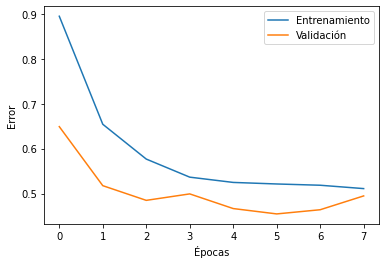

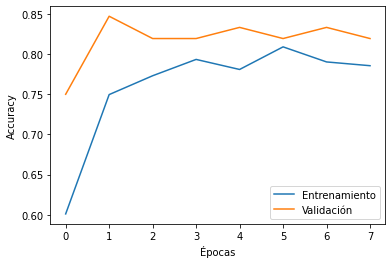

In [11]:
def plot_curves(history):
  plt.figure()
  plt.xlabel('Épocas')
  plt.ylabel('Error')
  plt.plot(history['loss'])
  plt.plot(history['val_loss'])
  plt.legend(['Entrenamiento', 'Validación'])

  plt.figure()
  plt.xlabel('Épocas')
  plt.ylabel('Accuracy')
  plt.plot(history['accuracy'])
  plt.plot(history['val_accuracy'])
  plt.legend(['Entrenamiento', 'Validación'], loc='lower right')

plot_curves(hist.history)

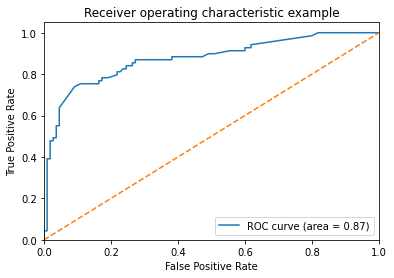

In [12]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()